# Data exploration with pandas and sklearn

## The goal of this homework is to discover structure in an unlabeled dataset. The observations in this dataset belong to several different clusters. The specific goal is to identify how many clusters there are and to which cluster each point belongs.

## Question 1 (5 points). Load the dataset into a pandas dataframe. Each row represents a single observation; the values in the columns are numeric features recorded for that observation (in other words, this is a 'tidy' dataset). How many rows and columns are there? What is the dimension of this dataset? In other words, how many different features are there for each observation?

In [70]:
#output of plotting commands is displayed inline
%matplotlib inline 
import matplotlib.pyplot as plt #for plotting
import pandas as pd #pandas

datafile = '/workspaces/tfcb_2022/homeworks/homework05/data/dataset.csv' #full path of datafile

df = pd.read_csv(datafile) #reading in dataframe
rows = len(df.index) #number of rows
columns = len(df.columns) #number of column
dimension = df.shape #dimensions of dataframe
elements = df.size #number of elements from dataframe

print(f'The number of rows in the dataset is {rows} and the number of columns is {columns}.')
print(f'The dimension of this dataset is {dimension}. The number of elements in the data set is {elements}.')

The number of rows in the dataset is 496 and the number of columns is 10.
The dimension of this dataset is (496, 10). The number of elements in the data set is 4960.


## Question 2 (5 points). Make a scatter plot of `dim1` versus `dim2`, ie the first column versus the second one. How many clusters do you see in this plot?

The plot of dim1 vs dim2 generates 3 clusters


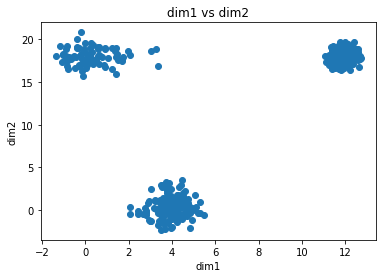

In [71]:
%matplotlib inline
plt.scatter(df['dim1'],df['dim2']) #scatterplot of dim1 vs dim2 columns
plt.title('dim1 vs dim2') #add title
plt.xlabel('dim1') #add x-axis title
plt.ylabel('dim2') #add y-axis title
print('The plot of dim1 vs dim2 generates 3 clusters')

## Question 3 (15 points). Perform principal components analysis (PCA) on the dataset, following along with the example in the lectures10and11 notebook. What fraction of the variation in the dataset is captured by the first two components? Make a plot of the first component against the second component. Now how many clusters do you see in the data? (2 points extra credit if you standardize the data first using `sklearn.preprocessing.StandardScaler`; see the lectures10and11 notebook for an example of how to do that.)

The fraction of the total variance explained by the first two component is: [0.71764809 0.14764088]
The total explained variance of the first two components is: 0.8652889715229936
I see 5 clusters in the scatter plot data.


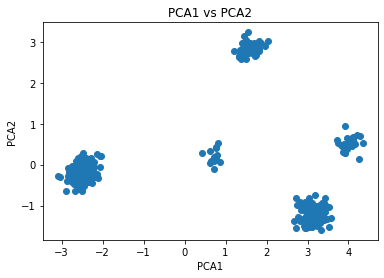

In [80]:
%matplotlib inline 
#start by importing numpy package and PCA and StandardScaler class
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#create the sklearn scaler object to standardize data
scaler = StandardScaler()

#fit the standardization model
scaler.fit(df)

#apply the model to standardize the data
df_scaled = scaler.transform(df)

#create and configure the pca model and set to 5 components
pca = PCA(n_components=5)

#fit the pca model to the standardized data
pca.fit(df_scaled)

#look at the model's explained_variance_ratio_
pca_variance_firsttwo = pca.explained_variance_ratio_[0:2] #splicing the variance ratio array for just the first two components
print('The fraction of the total variance explained by the first two component is:', pca_variance_firsttwo)
print('The total explained variance of the first two components is:', np.sum(pca_variance_firsttwo))

#transform the data to a new array
X_pca = pca.transform(df_scaled)

#plot the first two components(columns) and add title and axis labels
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('PCA1 vs PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
print('I see 5 clusters in the scatter plot data.')

## Question 4 (15 points). Use the KMeans clustering algorithm from scikit-learn to assign each point in the dataset to a cluster. Configure KMeans to find a number of clusters equal to the number that you identified visually in the PCA plot from question 3. What are the sizes of the different clusters (how many points are in each cluster)? Remake the PCA scatter plot (PC1 versus PC2) colored by the cluster labels.

cluster sizes: 0    256
1    128
2     64
3     32
4     16
Name: clusters, dtype: int64


Text(0, 0.5, 'PCA2')

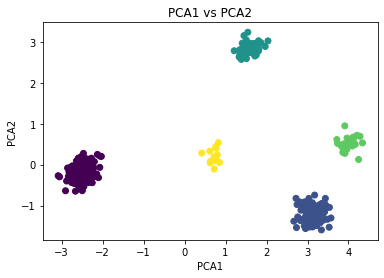

In [89]:
%matplotlib inline
from sklearn.cluster import KMeans #import needed class

nclust=5 #number of clusters I saw in question 3

#create a KMeans object and let it find 5 clusters using nclust and assign random_state to get reproducible results
kmeans = KMeans(nclust, random_state=10)

#fit the kmeans model to the scaled data
kmeans.fit(df_scaled)

#get the list of clusters using kmeans.predict and assign it to clusters
clusters = kmeans.predict(df_scaled)

#create a new column in the df dataframe with the KMeans cluster assignments
df['clusters'] = clusters 

#pandas value_counts method to get size of clusters from the clusters series:
print('cluster sizes:', df['clusters'].value_counts())

#remake the PCA plot colored by the kmeans clusters and add title and axis labels
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.title('PCA1 vs PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')


## Question 5. (10 points) Make a 'scatter matrix' plot showing each column of the original dataset plotted against each of the other 9 columns in a big 10x10 array (like we did for the iris dataset in the lectures10and11 notebook). Notice how the number of apparent clusters in the data varies depends on which pairs of features are being plotted against one another. Color the plots using the kmeans clusters like you did in the previous question.
You could use `pd.plotting.scatter_matrix` or try importing seaborn (`import seaborn as sns`) and use `sns.pairplot`. Or (optional) try both and see which looks nicer. `sns.pairplot` has a `hue` argument that you can use for coloring by passing `hue='clusters'`. See the `pd.plotting.scatter_matrix` and `sns.pairplot` examples in the lectures10and11.ipynb jupyter notebook.

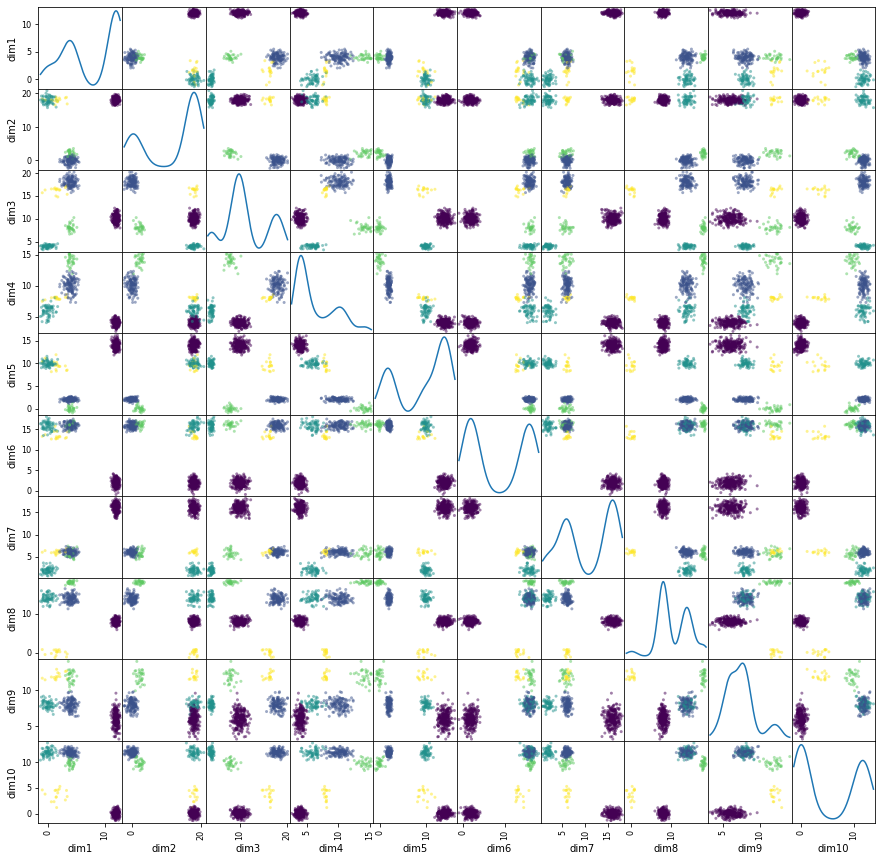

In [90]:
%matplotlib inline
#assign the original dataframe without the added clusters column
original_df = df.drop(columns=['clusters'])

#make scatter matrix from original dataframe and assign clusters color to the scatter matrix
pd.plotting.scatter_matrix(original_df, diagonal='kde', figsize=(15,15), c=df['clusters']);

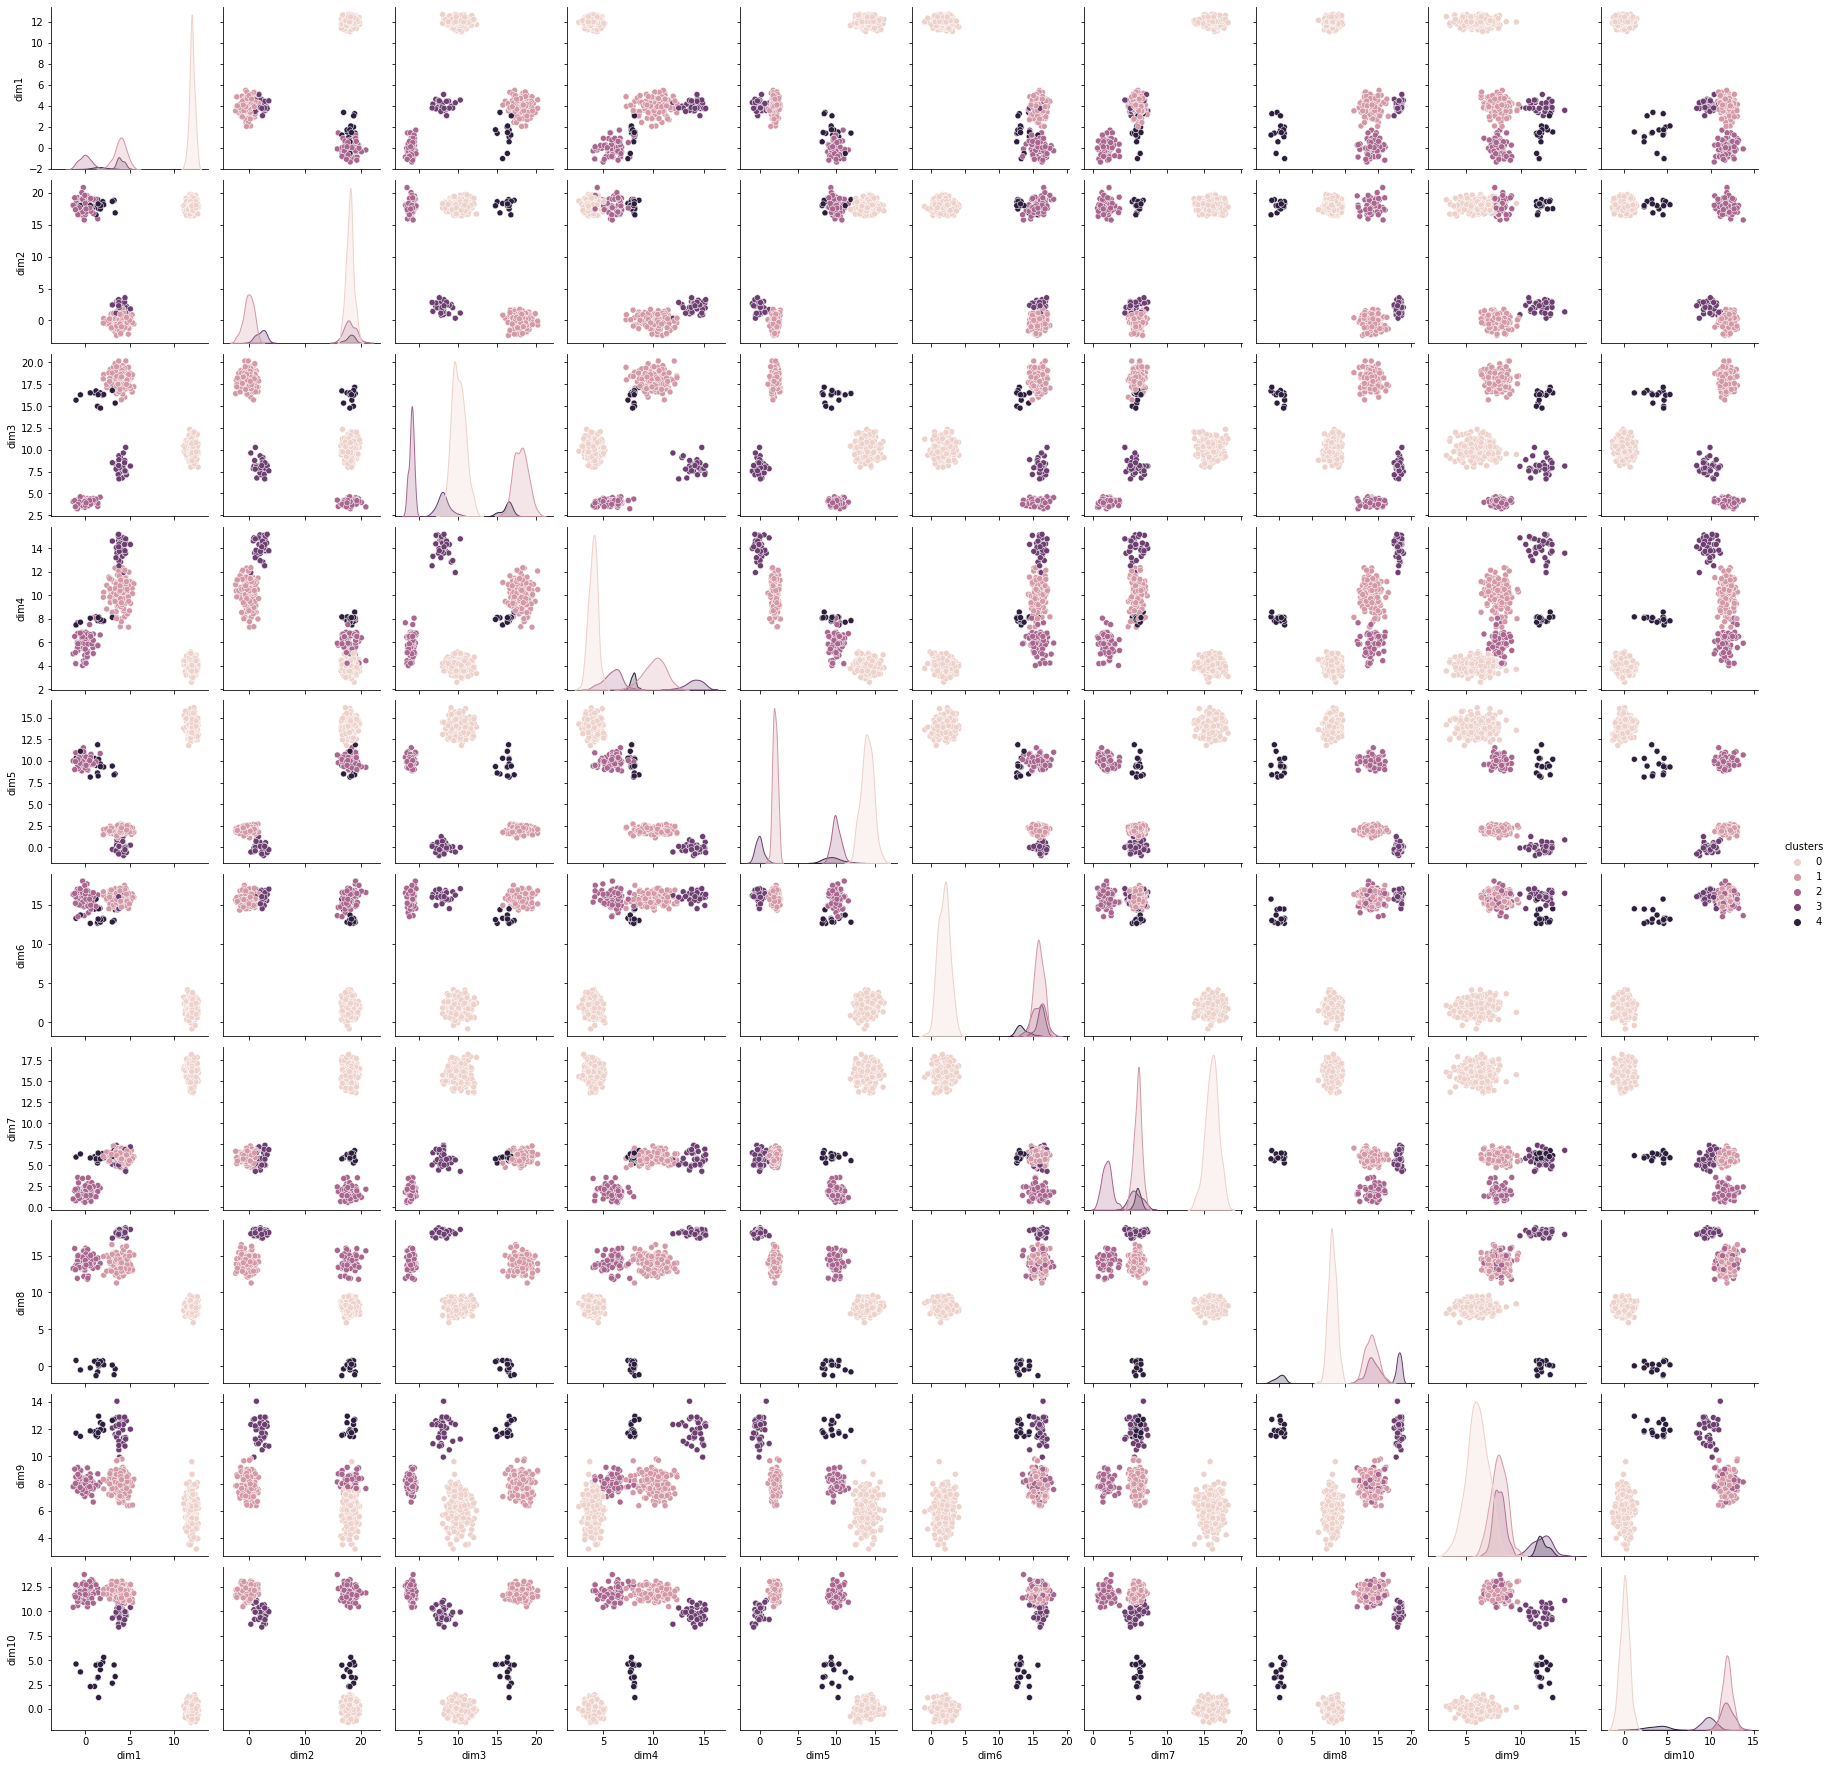

In [92]:
%matplotlib inline 
#import seaborn package for scatter matrix
import seaborn as sns
#use df b/c seaborn can identify the numeric columns and add colors based on the kmeans cluster column
sns.pairplot(df, hue='clusters');

## Question 5. (5 points of extra credit) Use the TSNE algorithm in scikit-learn to project the dataset down into 2 dimensions. How many clusters do you see in the TSNE scatter plot?

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 'TNSE2')

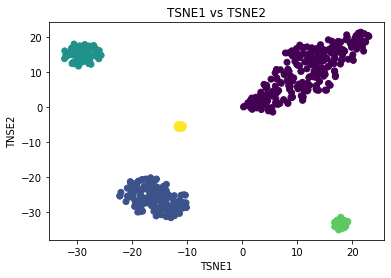

In [99]:
%matplotlib inline 
#import TSNE class from sklearn
from sklearn.manifold import TSNE

#create and assign the TSNE model with projection into 2 components 
tsne = TSNE(n_components=2)

#fit and transform scaled data to the model and assign it to new array
X_tsne = tsne.fit_transform(df_scaled)

#make a scatter plot of the two components, colored by the kmeans cluster assignments and assign title and axis labels
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters)
plt.title('TSNE1 vs TSNE2')
plt.xlabel('TSNE1')
plt.ylabel('TNSE2')

print('I see 5 clusters as well in the TSNE scatterplot.')